## 🔰*========== Regression ==========*🔰
### Neural Network Regression with Tensorflow 04.22

####Linear-Regression Overview: (Not NN's)
  * Given an entity/process that can be described with a set of ***n*** numerical features:
     <pre>F:  {f_1, f_2, ... , f_n} </pre> 
  * Use ***n-m+1*** features to predict ***m*** features by creating 2 ordered subsets (X,Y) of size ***n-m+1***, & ***m*** respectivly:
  <pre>
  X: {x_1, x_2,...,1} | (x_i ∈ F) & (x_i ∉ Y) & (|X| = n-m+1)
  Y: {y_1, y_2,...}   | (y_i ∈ F) & (y_i ∉ X) & (|Y| = m)
  </pre>
  * If each subset is represented by row vectors x,y respectively then construct a matrix **W** such that:
  <br/><pre> x⋅W = y  |  W: (n-m+1)x(m) </pre>
  *The last element of **X** is set equal to 1, 
  <br/>while the last row of **W** can be thought of as the bias (or intercept) row
  <br/>where each element w_(n-m+1,i) ∈ ℝ, corresponding to the i*th* element in Y


  ###Example:
  Assume a house can be described with 10 features:
  <br>**ex: #floors,SqFt, #baths, age, list_price, sell_price, etc**
  <pre> H: {h1, h2, h3, ... , h10} </pre>
  and we want to model the list price & sell price as a function of the other features:
  <pre>
  x: [#floors, Sqft, #baths, age, ... , 1]
  y: [list_price, sell_price]     
  W: [w11, w12
      w21, w22
        ... 
      w91, w92]
  </pre>

In **standard Linear Regressesion** we want to find the values of **w_ij** such that some error function is minimized.  

With **Neural Network Regression** we want to train a neural network that stands in for **W** such that some error function is minimized.

## 🔰*========== Tensorflow NN Regression ==========*🔰

##Steps:


1.   Create model. Define layers:
      <br>a. **input** 
      <br>b. **output**
      <br>c. **hidden**

2.   Compile model. define
      <br>a. **loss function**: Quantifies prediction error
      <br>b. **optimizer**: Specifies method for gradient decent
      <br>c. **evaluation metrics**: Quantifies performance of model

3.   Fit Model: Allow NN to find patterns in data. 


<pre>
#----Example of How to Create a Model:
layers = [tf.keras.Input(shape = (3,0)),
          tf.keras.layers.Dense(100, activation = 'relu'),
          tf.keras.layers.Dense(100,activation = 'relu'),
          tf.keras.layers.Dense(100,activation = 'relu'),
          tf.keras.layers.Dense(1, activation = None)]

model = tf.keras.Sequential(layers)
print(model.summary())
</pre>
<pre>
Output:
            Model: "sequential"
          _________________________________________________________________
          Layer (type)                Output Shape              Param #   
          =================================================================
          dense (Dense)               (None, 3, 100)            100       
                                                                          
          dense_1 (Dense)             (None, 3, 100)            10100     
                                                                          
          dense_2 (Dense)             (None, 3, 100)            10100     
                                                                          
          dense_3 (Dense)             (None, 3, 1)              101       
                                                                          
          =================================================================
          Total params: 20,401
          Trainable params: 20,401
          Non-trainable params: 0
          _________________________________________________________________
          None

</pre>
<pre>
#---- Example of How to Compile a Model:
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=10**-3),
              metrics= ['mae'])
</pre>

<pre>
#---- Example of How to fit a model:
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)
</pre>

## 🔰*========== Getting Started: ==========*🔰

In [2]:
import tensorflow as tf

In [3]:
def plot_data(data=None,regLines=None):
  plt.figure(figsize=(8,8))
  if data is not None:
    for x,y,lab,color in data:
      plt.scatter(x,y,c=color,label=lab,s=2)
  if regLines is not None:
    for x,y,lab,color in regLines:
      plt.plot(x,y,c=color,label=lab,lw=1,ls='--')
  
  plt.legend()

tf.Tensor(1.6203483, shape=(), dtype=float32)


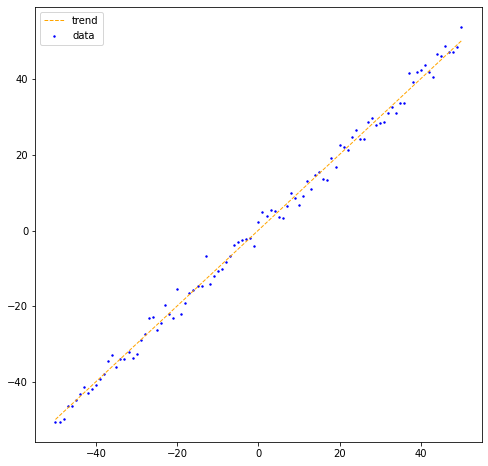

In [4]:
#----Creating some data:
import numpy as np
import matplotlib.pyplot as plt

#--- Input Features:
x = tf.range(-50,51,dtype='float32')

#--- Output Feature
tf.random.set_seed(123)                                     #Global seed
Generator_random = tf.random.Generator.from_seed(345)       #Operation Seed
r = Generator_random.normal(shape = (101,))                 #Random Numbers
y = x+(2*r)                                                 #'Data'

#--- Trend Line
avg_r = tf.reduce_mean(r)                                   #Expected Value of 'r'
y_trend = x+avg_r                                           #Trend Line



#--- Plot results:
plot_data(data= [(x,y,'data','blue')],
          regLines=[(x,y_trend,'trend','orange')])

print(tf.keras.losses.MeanAbsoluteError()(y,y_trend))             #MAE baseline: 1.62

In [5]:
#---- Creating a Simple Model:
tf.random.set_seed(123)

#----1. Creat a model using Sequential API:
layers = [tf.keras.layers.Dense(1)]
model = tf.keras.Sequential(layers)

#----2. Compile the model:
model.compile(loss = tf.keras.losses.mae,             # mae: Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(),  # SGD: Stochastic Gradient Decent
              metrics = ['mae'])

#---3. Fit the model:
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)    #MAE: 3.16 

Epoch 1/5
4/4 [==============================] - 1s 4ms/step - loss: 50.9114 - mae: 50.9114
Epoch 2/5
4/4 [==============================] - 0s 4ms/step - loss: 22.8087 - mae: 22.8087
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 3.7218 - mae: 3.7218
Epoch 4/5
4/4 [==============================] - 0s 4ms/step - loss: 2.6957 - mae: 2.6957
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 3.1594 - mae: 3.1594


In [6]:
#-- View a prediction example:
model.predict([17.0])

array([[13.312634]], dtype=float32)

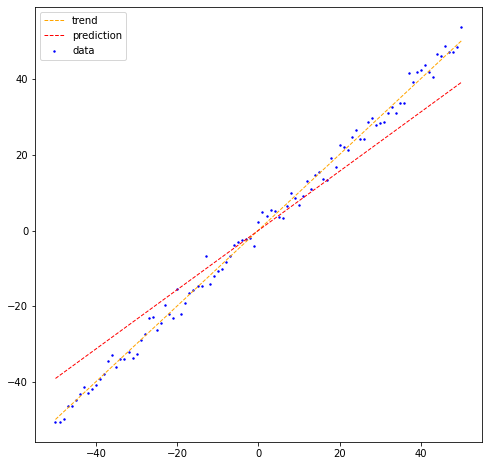

In [7]:
#--------------------------Show results of fitting:  mae ~= 3.159   *Notice that model does not perform as well as baseline
#--Get predictions:
y_pred = model.predict(x)

#--Plot:
plot_data(data= [(x,y,'data','blue')],
          regLines=[(x,y_trend,'trend','orange'),
                    (x,y_pred,'prediction','red')])


## 🔰*========== Improving the Model: ==========*🔰
## #--Ways of Improving the model:
  1. **Creating the Model**:
  <br> a. Add more layers?
  <br> b. Add more hidden units?
  <br> c. Change activation function?

  2. **Compliling the Model**:
  <br> a. Change optimization function?
  <br> b. Change learning rate?
  <br> c. Change other hyperparameters?
  
  3. **Fitting Model**:
  <br> a. Use more epochs? (let it train longer)
  <br> b. Use more data? (if possible)


## * In general start with a small model and build it up

In [8]:
#-------------------------------------Improve model: Increase # of epochs
#---- Creating a Simple Model:
tf.random.set_seed(123)

#----1. Creat a model using Sequential API:
layers = [tf.keras.layers.Dense(1)]
model = tf.keras.Sequential(layers)

#----2. Compile the model:
model.compile(loss = tf.keras.losses.mae,             # mae: Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(),  # SGD: Stochastic Gradient Decent
              metrics = ['mae'])

#---3. Fit the model:
model.fit(tf.expand_dims(x, axis=-1), 
          y, 
          epochs=100)                                  # <---- Change the num of epochs:

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 50.9114 - mae: 50.9114
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 22.8087 - mae: 22.8087
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 3.7218 - mae: 3.7218
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 2.6957 - mae: 2.6957
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 3.1594 - mae: 3.1594
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 3.4253 - mae: 3.4253
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 2.2611 - mae: 2.2611
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 3.5137 - mae: 3.5137
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 4.2589 - mae: 4.2589
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 2.6560 - mae: 2.6560
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 4.5

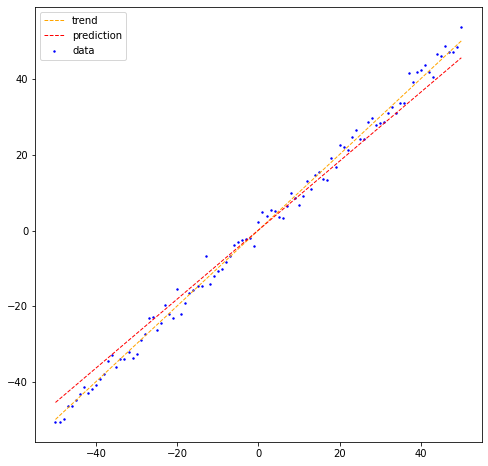

In [9]:
#--------------------------Show results of fitting: mae ~= 2.26   *Improvement over 3.159
#--Get predictions:
y_pred = model.predict(x)

#--Plot:
plot_data(data= [(x,y,'data','blue')],
          regLines=[(x,y_trend,'trend','orange'),
                    (x,y_pred,'prediction','red')])


In [10]:
#-------------------------------------Improve model: Change the learning rate
#---- Creating a Simple Model:
tf.random.set_seed(123)

#----1. Creat a model using Sequential API:
layers = [tf.keras.layers.Dense(1)]
model = tf.keras.Sequential(layers)

#----2. Compile the model:
model.compile(loss = tf.keras.losses.mae,                                   # mae: Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(learning_rate = 10**-3),  # <------ Change the learning rate from 10**-2 -> 10**-3
              metrics = ['mae'])

#---3. Fit the model:
model.fit(tf.expand_dims(x, axis=-1), 
          y, 
          epochs=100) # <---- keep epochs at 100

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 57.2826 - mae: 57.2826
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 54.4723 - mae: 54.4723
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 51.9633 - mae: 51.9633
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 49.5771 - mae: 49.5771
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 47.0271 - mae: 47.0271
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 44.3032 - mae: 44.3032
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 41.8042 - mae: 41.8042
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 39.2805 - mae: 39.2805
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 36.5515 - mae: 36.5515
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 33.8462 - mae: 33.8462
Epoch 11/100
4/4 [==============================] - 0s 3ms/

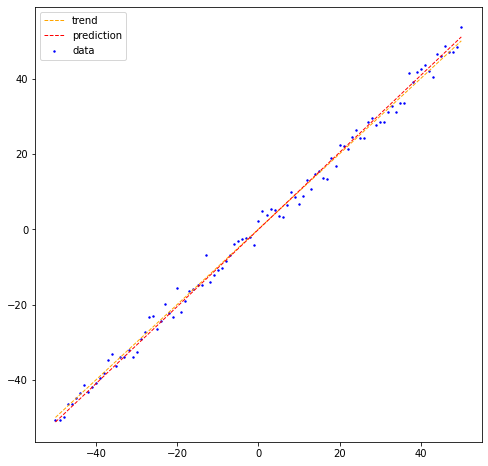

In [11]:
#--------------------------Show results of fitting:   Notice Model fits better, mae ~= 1.63
#--Get predictions:
y_pred = model.predict(x)

#--Plot:
plot_data(data= [(x,y,'data','blue')],
          regLines=[(x,y_trend,'trend','orange'),
                    (x,y_pred,'prediction','red')])

In [12]:
#-------------------------------------Improve model: Change the momentum
#---- Creating a Simple Model:
tf.random.set_seed(123)

#----1. Creat a model using Sequential API:
layers = [tf.keras.layers.Dense(1)]
model = tf.keras.Sequential(layers)

#----2. Compile the model:
model.compile(loss = tf.keras.losses.mae,                                   # mae: Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(learning_rate = 10**-3,   # <------ keep the learning rate from 10**-2 -> 10**-3
                                                  momentum = 0.01),         # <------ Change the momentum
              metrics = ['mae'])

#---3. Fit the model:
model.fit(tf.expand_dims(x, axis=-1), 
          y, 
          epochs=100) # <---- keep epochs at 100

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 57.2795 - mae: 57.2795
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 54.4442 - mae: 54.4442
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 51.9090 - mae: 51.9090
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 49.4980 - mae: 49.4980
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 46.9226 - mae: 46.9226
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 44.1724 - mae: 44.1724
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 41.6470 - mae: 41.6470
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 39.0979 - mae: 39.0979
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 36.3420 - mae: 36.3420
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 33.6093 - mae: 33.6093
Epoch 11/100
4/4 [==============================] - 0s 5ms/

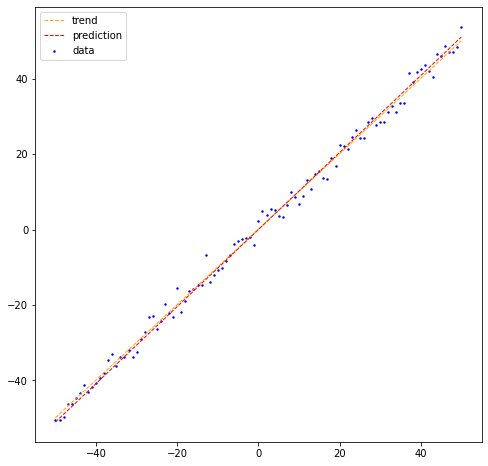

In [13]:
#--------------------------Show results of fitting:   Notice Model fits better, mae ~= 1.63 : No real change, very close to trend line mae ~= 1.62035
#--Get predictions:
y_pred = model.predict(x)

#--Plot:
plot_data(data= [(x,y,'data','blue')],
          regLines=[(x,y_trend,'trend','orange'),
                    (x,y_pred,'prediction','red')])

In [14]:
#-------------------------------------Improve model: Change the Optimizer
#---- Creating a Simple Model:
tf.random.set_seed(123)

#----1. Creat a model using Sequential API:
layers = [tf.keras.layers.Dense(1)]  
model = tf.keras.Sequential(layers)

#----2. Compile the model:
model.compile(loss = tf.keras.losses.mae,                                   # mae: Mean Absolute Error
              optimizer = tf.keras.optimizers.Adam(learning_rate = 10**-2),  # <------ Change the Optimizer(SGD -> Adam) & LR (10**-3 -> 10**-2)
              metrics = ['mae'])

#---3. Fit the model:
model.fit(tf.expand_dims(x, axis=-1),
          y, 
          epochs=100)       # <---- keep epochs 100

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 57.6901 - mae: 57.6901
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 56.7052 - mae: 56.7052
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 55.7281 - mae: 55.7281
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 54.7342 - mae: 54.7342
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 53.7471 - mae: 53.7471
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 52.7755 - mae: 52.7755
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 51.7610 - mae: 51.7610
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 50.7819 - mae: 50.7819
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 49.7621 - mae: 49.7621
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 48.7568 - mae: 48.7568
Epoch 11/100
4/4 [==============================] - 0s 3ms/

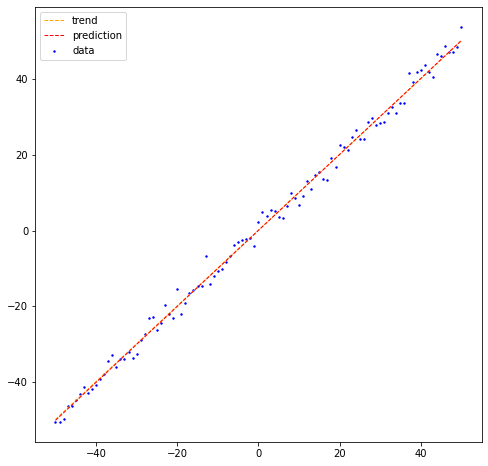

In [15]:
#--------------------------Show results of fitting:   Notice Model fits better, mae ~= 1.61 : slight improvement(!) over trend line mae = 1.62035
#--Get predictions:
y_pred = model.predict(x)

#--Plot:
plot_data(data= [(x,y,'data','blue')],
          regLines=[(x,y_trend,'trend','orange'),
                    (x,y_pred,'prediction','red')])

## 🔰*========== Splitting Dataset into 3: ==========*🔰

 1. **Traning Set**: Model ***learns*** from this data, typically 70-80% of total data.
 2. **Validation Set**: Model gets ***tuned*** on this data, typically 10-15% of total data.
 3. **Test Set**: Model is ***tested*** on this data, typically 10-15% of total data.


###🔑If the amount of data is sparce, the validation set is often droped <br> &ensp;&emsp; relying on just Training & Test set.

In [16]:
#----------------------------- 'Split' the data: 
x_train = x[0:81]
x_test = x[81:]

y_train = y[0:81]
y_test = y[81:]

print(len(x))
print(len(x_train),",", len(y_train))
print(len(x_test),",", len(y_test))


101
81 , 81
20 , 20


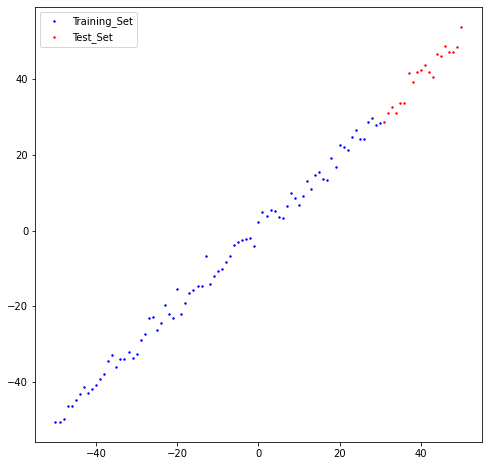

In [17]:
plot_data(data= [(x_train,y_train,'Training_Set','blue'),
                 (x_test,y_test,'Test_Set','red')])


## 🔰*========== Model Summary: ==========*🔰

In [18]:
#-------------------------------------Model Summary
#---- Creating a Simple Model:
tf.random.set_seed(123)

#----1. Creat a model using Sequential API:
layers = [tf.keras.layers.Dense(1)]  
model = tf.keras.Sequential(layers)

#----2. Compile the model:
model.compile(loss = tf.keras.losses.mae,                                   
              optimizer = tf.keras.optimizers.Adam(learning_rate = 10**-2),  
              metrics = ['mae'])

In [19]:
model.summary()                                                          # <---- Will cause an error because model has not been built yet:

#ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

ValueError: ignored

In [20]:
#------------------------------------- Defining input shape
#---- Creating a Simple Model:
tf.random.set_seed(123)

#----1. Creat a model using Sequential API:
layers = [tf.keras.layers.Dense(1, input_shape = (1,))]          #<----- Specify input shape durring compile

model = tf.keras.Sequential(layers)

#----2. Compile the model:
model.compile(loss = tf.keras.losses.mae,                                   
              optimizer = tf.keras.optimizers.Adam(learning_rate = 10**-2),  
              metrics = ['mae'])

In [21]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


###Parameter Training:
* **Total Parameters**: All the parameters of the model.
* **Trainable Parameters**: Parameters the model will update durring training.
* **Non-Trainable Parameters**: Parameters not updated durring training.
  * Typically used durring **transfer learning**.
  * Already learned patterns from another model are reused as a starting point. 

In [22]:
#--- Train model:
model.fit(x_train,y_train,epochs=100, verbose = 0)   #<---Verbose: how much text/information is displayed durring training. 

In [23]:
y_predict = tf.squeeze(model.predict(x_train))
tf.keras.losses.MeanAbsoluteError()(y_train,y_predict)

<tf.Tensor: shape=(), dtype=float32, numpy=1.6217282>

In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 🔰*========== Visualize Model: ==========*🔰

In [25]:
from tensorflow.keras.utils import plot_model

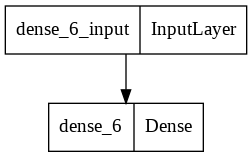

In [26]:
plot_model(model)

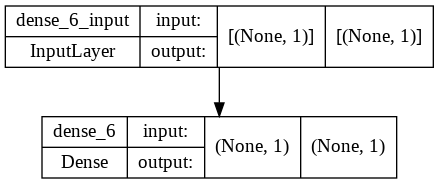

In [27]:
plot_model(model,
           show_shapes = True)

## 🔰*========== Naming Models: ==========*🔰

In [28]:
#------------------------------------- Provide more meaningful labels to model
#---- Creating a Simple Model:
tf.random.set_seed(123)

#----1. Creat a model using Sequential API:
layers = [tf.keras.layers.Dense(10, input_shape = (1,), name = "Input_Layer"),
          tf.keras.layers.Dense(1, name = "Output_Layer")]          

model = tf.keras.Sequential(layers, name = 'Regression_Model')

#----2. Compile the model:
model.compile(loss = tf.keras.losses.mae,                                   
              optimizer = tf.keras.optimizers.Adam(learning_rate = 10**-2),  
              metrics = ['mae'])

In [29]:
model.summary()

Model: "Regression_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


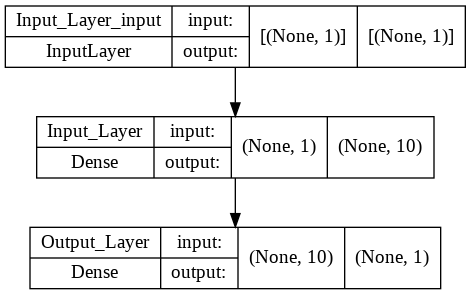

In [30]:
plot_model(model,
           show_shapes = True)

## 🔰*========== Visualize Train & Test Predictions: ==========*🔰

In [31]:
#--- Train model:
model.fit(x_train,y_train,epochs=100, verbose = 0)

ytrain_pred = model.predict(x_train)
ytest_pred = model.predict(x_test)

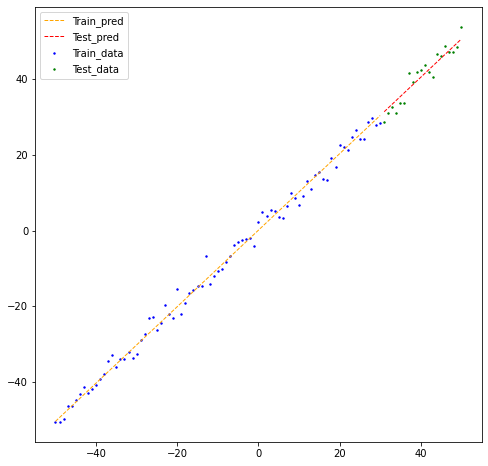

In [32]:
plot_data(data= [(x_train,y_train,'Train_data','blue'),
                 (x_test,y_test,'Test_data','green')],
          regLines=[(x_train,ytrain_pred,'Train_pred','orange'),
                    (x_test,ytest_pred,'Test_pred','red')])

## 🔰*========== Model Evaluations: ==========*🔰

In [33]:
ytrain_pred = tf.squeeze(ytrain_pred)
ytest_pred = tf.squeeze(ytest_pred)

#--- Reviewing Different Evaluation Metrics (For Regression):
print(model.evaluate(x_train,y_train),'\n')                                               #--Model was trained using  mae
print("MAE: ", tf.metrics.mean_absolute_error(y_train, ytrain_pred).numpy())              #-- Prioritizes Minimizing Errors on Samples of Large Magnitude 
print("MSE: ", tf.metrics.mean_squared_error(y_train,ytrain_pred).numpy())                #-- Prioritizes Minimizing Errors on Samples with Largest Magnitude
print("MAPE: ",tf.metrics.mean_absolute_percentage_error(y_train,ytrain_pred).numpy())    #-- Prioritizes Minimizing Errors Relative to Magnitude
print("MSLE: ",tf.metrics.mean_squared_logarithmic_error(y_train,ytrain_pred).numpy())    #-- Prioritizes Minimizing Errors When Data Extends Over Many Orders of Magnitude

3/3 [==============================] - 0s 5ms/step - loss: 1.5315 - mae: 1.5315
[1.5314500331878662, 1.5314500331878662] 

MAE:  1.5314499
MSE:  3.849003
MAPE:  16.265463
MSLE:  0.043012246


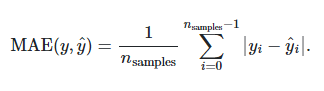

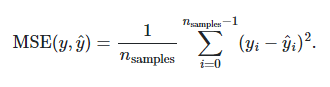

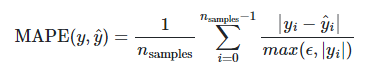

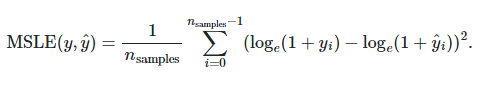

## 🔰*========== Saving/Loading Models: ==========*🔰

In [35]:
#--- Save Model in H5 format:
model.save("Model_Folder.h5")

In [37]:
#--- Reload The model:
model_reload = tf.keras.models.load_model('Model_Folder.h5')
model_reload.summary()

Model: "Regression_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [47]:
#---- 'Test' if reloaded model is the same as the original model
rload_pred = model_reload.predict(x_train)
model_pred = model.predict(x_train)

rload_pred.shape,model_pred.shape
print('Are all Predictions identical?: ','Yes' if all(rload_pred == model_pred) else 'No')

Are all Predictions identical?:  Yes


## 🔰*========== Loading from google Colab ==========*🔰

In [48]:
from google.colab import files
files.download('/content/Model_Folder.h5')   #<--- Will download to local machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

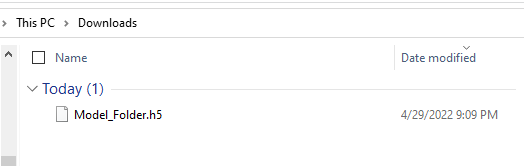

In [58]:
#---- Colab Drive Module:
from google.colab import drive
import pandas as pd


In [57]:
#--- Mount Drive
drive.mount('/content/drive/',force_remount=True)

In [61]:
#--- Specify Google Drive Path
dataset_folder = '/content/drive/MyDrive/TensorFlow/Udemy_Tutorial/datasets'
file_name = 'insurance.csv'

#--- Download data from drive:
df = pd.read_csv(f'{dataset_folder}/{file_name}')

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
